# Лабораторная работа 4. Решающие деревья и леса. Кластеризация и понижение размерности.

## Решающие деревья и леса

Давайте рассмотрим следующую задачу: зная информацию о пациенте попробуем предсказать есть ли у него сердечное заболевание. Каждый пациент будет описываться 13 признаками, включающими в себя возраст, пол, информацию из электрокардиограммы и т.д.

Загрузите данные из файла [*heart.dat.txt*](./heart.dat.txt), используя пандас, в переменную *data* (разделитель полей — пробел). Значение целевой переменной находится в последней колонке (*Absence_(1)_or_presence_(2)_of_heart_disease*). 

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
?pd.read_csv

In [91]:
data = pd.read_csv('heart.dat.txt', sep=" ", header=0)

In [106]:
X.shape[0]

270

Выделите признаки в переменную *X*, а целевую зависимость — в *y*.

In [94]:
X, y = data.ix[:, 0:13], data.ix[:,13:]

В начале рассмотрим решающее дерево. Как известно, одно дерево обладает плохой обобщающей сопособностью, поэтому стоит подбирать параметры, такие как высота дерева и минимальное число объектов в листе, для уменьшения этого явления.

Для оценки качества будем использовать 5-Fold кросс-валидацию с метрикой *AUC-ROC*. Создайте объект [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html) со следующими параметрами:
 - первым параметром нужно передать количество объектов в выборке
 - *n_folds* равно 5
 - установить *shuffle=True*, чтобы объекты были перемешаны перед разбиением
 - зафиксировать *random_state*

In [95]:
from sklearn.cross_validation import KFold

In [107]:
kfold = KFold(X.shape[0], n_folds=5, shuffle=True,  random_state=241)

In [108]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [109]:
tree_clf = DecisionTreeClassifier(random_state=241)

In [110]:
?cross_val_score

In [112]:
my_res_metrics = cross_val_score(estimator=tree_clf, X = X.values, y = y.values, cv = kfold, scoring='roc_auc')

Теперь воспользуемся функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html) для оценки качества. Она принимает следующие параметры:
 - *estimator* — в данном случае им будет решающее дерево [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Здесь и далее фиксируйте параметр *random_state* у решающего дерева, чтобы результат был воспроизводим. В этом пункте ограничения на другие параметры не накладываются
 - *X* и *y* — матрица "объект-признак" и значение целевой переменной соответственно
 - *scoring* просто указать *roc_auc_score*
 - *cv* — передать созданный ранее kfold
 
Эта функция возвращает массив значений качества на каждом разбиении. 

**(1 балл)** Посчитайте среднее, минимальное и максимальное качество, которое получатеся с помощью решающего дерева.

### Среднее качество

In [114]:
np.average(my_res_metrics)

0.74477946118663463

### Минимальное качество

In [115]:
np.min(my_res_metrics)

0.70880681818181823

### Максимальное качество

In [116]:
np.max(my_res_metrics)

0.83806818181818188

**(0.5 балла)** Теперь попробуем посмотреть изменится ли оно, если ограничить высоту дерева. Зафиксируйте высоту дерева равной 3 и повторите аналогичные действия. Увеличились ли показания качества по сравнению с прошлым разом?

In [118]:
tree_clf = DecisionTreeClassifier(random_state=241, max_depth=3)
my_res_metrics_depth_3 = cross_val_score(estimator=tree_clf, X = X.values, y = y.values, cv = kfold, scoring='roc_auc')

In [119]:
my_res_metrics_depth_3

array([ 0.77517241,  0.88392857,  0.89133523,  0.84090909,  0.84992987])

  ### Среднее

In [120]:
np.average(my_res_metrics_depth_3)

0.84825503543525682

### Максимальное

In [121]:
np.max(my_res_metrics_depth_3)

0.89133522727272718

### Минимальное

In [122]:
np.min(my_res_metrics_depth_3)

0.77517241379310353

## Вывод: 
### уменьшение высоты дерева привело к улучшению качества предсказаний

**(0.5 балла)** А принесет ли улучшение, если ограничить высоту дерева 1? 

In [127]:
tree_clf = DecisionTreeClassifier(random_state=241, max_depth=1)
my_res_metrics_depth_1 = cross_val_score(estimator=tree_clf, X = X.values, y = y.values, cv = kfold, scoring='roc_auc')

In [128]:
my_res_metrics_depth_1

array([ 0.63034483,  0.66895604,  0.80823864,  0.74715909,  0.7026648 ])

### Среднее

In [129]:
np.average(my_res_metrics_depth_1)

0.71147267908978384

### Максимальное

In [130]:
np.max(my_res_metrics_depth_1)

0.80823863636363624

### Минимальное

In [131]:
np.min(my_res_metrics_depth_1)

0.63034482758620691

**(1 балл)** Напишите почему наложение ограничения на высоту дерева влияет на его обобщающую способность. Почему деревья глубиной 1 по одиночке могут быть неэффективны?

#### Eсли дерево глубокое, тогда куча условий деления на правую ветвь, левую ветвь. Так как подгоняем дерево к тренировочным данным,  то часть условий не работает для test данных. Иначе говоря, мы переобучаемся, а ограничение на глубину позволяет бороться с оверфитом.
#### Если у нас глубина 1, то мы недообучаемся. Фактически, мы имеем дело с пнем. Пень не очень умен и не может переобучиться, т.к. слишком просто устроен

**(2 балла)** Теперь попробуем провести аналогичные эксперименты для случая решающего леса [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Рассмотрите 10, 50 и 100 деревьев в случайном лесу (поле *n_estimators*) для высоты деревьев по умолчанию, 3 и 1. Не забудьте зафиксировать *random_state*. Улучшается ли качество при увеличении количества деревьев в лесу? Сильно ли влияет ограничение на высоту деревьев при построении леса?

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
def research_rfc(X, y, kfold):
        import warnings
        n_estimators = [10,50,100, 150]
        n_max_depth = [None, 3, 1, 5]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            for n_est in n_estimators:
                for n_depth in n_max_depth:
                    rfc_clf = RandomForestClassifier(n_estimators=n_est, max_depth=n_depth, random_state=241)
                    my_res_metrics_rfc_def = cross_val_score(estimator=rfc_clf, X = X.values,
                                                             y = y.values, cv = kfold, scoring='roc_auc')
                    print('n_estimators = %d\n \
                           n_max_depth=%s\n \
                           average scoring = %f\n \
                           max scoring = %f\n \
                           min scoring = %f' %
                         (n_est, 
                          n_depth, 
                          np.average(my_res_metrics_rfc_def), 
                          np.max(my_res_metrics_rfc_def), 
                          np.min(my_res_metrics_rfc_def)))

In [198]:
research_rfc(X, y, kfold)

n_estimators = 10
                            n_max_depth=None
                            average scoring = 0.872735
                            max scoring = 0.950994
                            min scoring = 0.801136
n_estimators = 10
                            n_max_depth=3
                            average scoring = 0.900112
                            max scoring = 0.974432
                            min scoring = 0.838621
n_estimators = 10
                            n_max_depth=1
                            average scoring = 0.860150
                            max scoring = 0.913352
                            min scoring = 0.784801
n_estimators = 10
                            n_max_depth=5
                            average scoring = 0.868258
                            max scoring = 0.937500
                            min scoring = 0.783448
n_estimators = 50
                            n_max_depth=None
                            average scoring = 0.886101
           

### Вывод: 
##### Результаты работы алгоритма нам показывают, что качество зависит от:
* ограничения максимальной глубины
* количества деревьев
##### Мы получили максимальную оценку при n_estimators = 50 и max_depth = 1 (avg = 0.910931) / max_depth = 3 (avg = 0.908771)
##### Увеличение числа деревьев, как и увеличение глубины - приводит к ухудшению метрики качества

**(1 балл)** И напоследок посмотрим, какие признаки являются наиболее *важными*. Обучите решающий лес с оптимальными на ваш взгляд параметрами (можете опираться на эксперименты ранее) на всей выборке и посмотрите на поле *feature\_importances\_* у обученного леса. Выпишите названия наиболее и наименее важных признаков с точки зрения случайного леса. 

In [203]:
rfc_clf = RandomForestClassifier(n_estimators=50, max_depth=1, random_state=241)
rfc_clf.fit(X.values, y.values)

C:\Users\got\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [205]:
rfc_clf.feature_importances_

array([ 0.04,  0.02,  0.2 ,  0.02,  0.  ,  0.  ,  0.02,  0.08,  0.06,
        0.16,  0.06,  0.16,  0.18])

####  Самые важные признаки:
* thal
* number_of_major_vessels
* oldpeak

#### Наименее важные признаки:
* serum_cholestoral_in_mg/dl
* fasting_blood_sugar

## Кластеризация

В этой части работы вы будете работать с уже известным вам набором данных изображений цифр, но в данном случае мы рассмотрим задачу кластеризации. Целью работы будет посмотреть можно ли разделить изображения цифр по классам,  не зная их истинных меток.

Для начала вам потребуется загрузить набор данных, используя функцию [load_digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), в переменную data:

In [207]:
from sklearn.datasets import load_digits

In [208]:
?load_digits

In [209]:
data = load_digits()

Сами изображения чисел в виде векторов хранятся в поле *data*, а истинные метки — в поле *target*. Сохраните изображения в переменную *X*, а истинные метки — *y*.

In [210]:
X = data.data
y = data.target

Задача кластеризации состоит в следующем: нужно построить разбиение всех объектов на *K* кластеров, где *K* задано заранее. В данном случае в датасете присутствуют цифры от 0 до 9, поэтому *K* будет равно 10.

Для того, чтобы в дальнейшем оценивать качество получившейся кластеризации, будем использовать следующие метрики:
 - [Homogenity](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) — эта метрика основывается на использовании информации об истинных метках объектов. Она позволяет оценить, все ли объекты в кластере имеют одну и ту же метку. В качестве первого параметра ей передаются истинные метки класса, второй параметр — предсказанные. Обратите внимание, что данная метрика не является симметричной. Данная метрика принимает значения от 0 до 1, где 1 соответствует наилучшей кластеризации.
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) — эта метрика, в отличии от предыдущей, оперирует только с исходной матрицей "объект-признак" и предсказанными метками. Она позволяет получить информацию насколько "хорошей" получилась кластеризация с точки зрения расположения объектов в кластере, оценивая насколько далеко они находятся друг от друга. Данная метрика принимает значения от -1 до 1, где 1 соответствует лучшей кластеризации, 0 говорит о том, что есть перекрывающиеся кластера.

In [213]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

**(1 балл)** Построение кластеризации будем производить с помощью метода [К-средних](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Для этого вам нужно сделать следующее:
 - создать объект *KMeans*, имеющий следующие интересные для нас параметры:
   - количество кластеров *n_clusters*
   - *random_state* — его следует зафиксировать для воспроизводимости результата
 - вызвать метод *fit_predict*, передав на вход переменную *X* и сохранив результаты в переменную *predicted_labels*

In [214]:
from sklearn.cluster import KMeans

In [274]:
k_means = KMeans(n_clusters=10, random_state=241)

In [275]:
predicted_labels = k_means.fit_predict(X)

**(2 балла)** Теперь вычислите значения указанных выше метрик для полученной кластеризации. Хорошее ли качество имеет данная кластеризация, исходя из интерпретации метрик?

### Homogenity

In [276]:
homogeneity_score(y, predicted_labels)

0.73879613359812624

### Silhouette Coefficient 

In [277]:
silhouette_score(X, predicted_labels)

0.18233873020656441

#### Первая метрика качества указывает на то, что в кластерах, достаточно большой процент предсказанных значений с той же меткой; вторая метрика далека от 1 и близка к 0 т.е. стремиться к перекрытиям

**(1 балл)** Иногда полезно бывает посмотреть на результаты кластеризации. Поэтому воспользуемся методами уменьшения размерности, чтобы визуализировать результаты кластеризации. Для этих целей будем использовать два метода [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), который основан на получении новых признаков с помощью линейной комбинации старых, а так же [tSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), который преобразует пространство более сложным образом, пытаясь оставить рядом объекты, которые были близки в исходном пространстве. Эти методы имеют схожий интерфейс, поэтому в обоих случаях последовательность дейтствий будет заключаться в следующем:
 - создать соответствующий объект, указав количество компонент *n_components* равным 2
 - вызвать метод *fit_transform*, передав переменную *X* и сохранив результат в переменные *X_pca* и *X_tsne* соответственно
 
Обратите внимание, что преобразование *tSNE* может вычисляться некоторое время (несколько минут). 

In [278]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [279]:
X_pca = PCA(n_components=2).fit_transform(X)
X_tsne = TSNE(n_components=2).fit_transform(X)

**(1 балл)** Теперь выполните 2 кластеризации, но в качестве матрицы "объекты-признаки" передавайте полученные ранее *X_pca* и *X_tsne*. Сохраните результаты предсказания в переменные *predicted_labels_pca* и *predicted_labels_tsne* соответственно. Посчитайте качество каждой кластеризации с помощью указанных ранее метрик качества.

In [280]:
predicted_labels_pca = k_means.fit_predict(X_pca)
predicted_labels_tsne = k_means.fit_predict(X_tsne)

### Homogenity

#### PCA

In [281]:
homogeneity_score(y, predicted_labels_pca)

0.52346551277191355

#### TSNE

In [282]:
homogeneity_score(y, predicted_labels_tsne)

0.82153982113023771

### Silhouette Coefficient

#### PCA

In [283]:
silhouette_score(X, predicted_labels_pca)

0.08300523765432008

#### TSNE

In [284]:
silhouette_score(X, predicted_labels_tsne)

0.14266969506987273

**(1 балл)** Сильно ли отличается качество новых кластеризаций от исходной для каждого способа сжатия размерности? Нашелся ли способ уменьшения размерности, который позволяет достичь наилучшего качества по обеим метрикам?

#### Первая метрика: качаство кластеризации при использовании PCA сильно упало, по сравнению с базовым значением (0.73879613359812624); Для TSNE наоборот - ощутимо вырасло.
#### Вторая метрика: качество кластеризации сильно упало для PCA и стало близким к 0 (что говорит о перекрытиях); для TSNE качество тоже упало в сравнении с базовым значением (0.18233873020656441), но не так ощутимо, как для PCA
#### При использовании PCA качество кластеризации сильно упало. Для TSNE метрики показывают несколько разные результаты - 1я - качество возрасло, 2я - несколько снизилось.

С помощью функции *plot_embedding* ниже можно посмотреть на визуализацию кластеризации. На вход ей передается двумерная матрица "обекты-признаки", истинные метки и предсказанные метки. Она строит на плоскости объекты, при этом числом обозначена истинная метка объекта, а одинаковым цветом — объекты одного кластера.

In [285]:
def plot_embedding(X, y, predicted_labels, title=None):
    %matplotlib inline
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(predicted_labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

**(1 балл)** Для каждой из матриц *X_pca* и *X_tsne* и результатов соответствующих кластеризаций (*predicted_labels_pca* и *predicted_labels_tsne*) вызовите функцию *plot_embedding*.

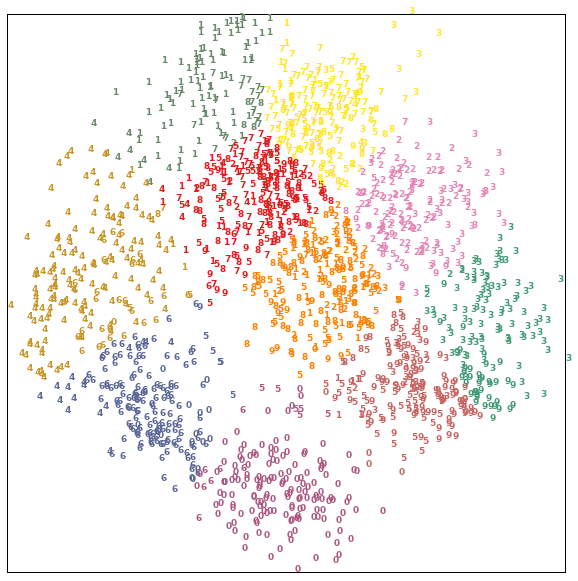

In [286]:
plot_embedding(X_pca, y, predicted_labels_pca)

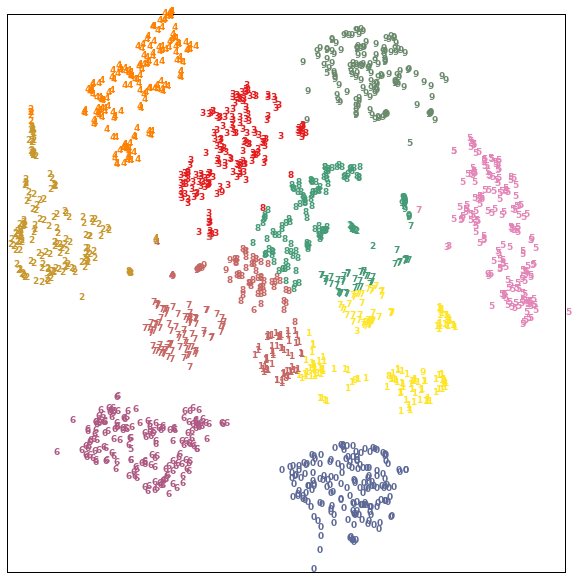

In [287]:
plot_embedding(X_tsne, y, predicted_labels_tsne)

**(2 балла)** Проанализируйте полученные результаты:
 - какой из трех методов кластеризации: на исходных признаках, на признаках, полученных с помощью PCA или tSNE дал наилучший результат по обеим метрикам?
 - какой из методов сжатия размерности дает наилучшую визуализацию на плоскости?
 - можно ли сказать, что результаты визуализации согласуются с метриками: если кластеры кажутся отделимыми визуально, то и значения метрик выше?
 - как вы думаете: если увеличить число кластеров (то есть взять не 10, а 12, 15 и пр.) может ли кластеризация быть более качественной? Почему?

#### какой из трех методов кластеризации: на исходных признаках, на признаках, полученных с помощью PCA или tSNE дал наилучший результат по обеим метрикам?  
###### На мой взгляд, наилучший результат дали кластеризация с помощью tsne и класетризация на исходных признаках ( о чем можно судить исходя из значений метрик качества, качество по двум метрикам при использовании PCA значительно упало)

#### какой из методов сжатия размерности дает наилучшую визуализацию на плоскости?
###### Мне кажется, что наилучшую визуализацию на плоскости дал метод сжатия tSNE: основная масса облака каждого класстера четко различима, в отличии от визуализации при использовании PCA

#### можно ли сказать, что результаты визуализации согласуются с метриками: если кластеры кажутся отделимыми визуально, то и значения метрик выше?
###### Это действует только для метрики Silhouette Coefficient (т.к. именно она опирается на расстояния), для первой метрики важна - доля элементов с одинаковой меткой в данном кластере)

#### как вы думаете: если увеличить число кластеров (то есть взять не 10, а 12, 15 и пр.) может ли кластеризация быть более качественной? Почему?
###### Алгоритм КMeans очень чувствителен к выбору числа кластеров, поэтому важно правильно  подобрать число кластеров. Если мы используем PCA и будем увеличивать число кластеров, то в силу самого преобразования (опираемся на линейную комбинацию) расстояние между кластерами будет уменьшаться, что приводит к стремлению к перекрытиям и падению качества кластеризации; Если мы используем TSNE и будем увеличивать число кластеров, то в силу самого преобразования (поиск ближайших элементов, по-умолчанию - мера близости евклидова метрика) мы получим больше кластеров, дальше отстоящих друг от друга т.е. мы получим улучшение метрик качества для данного вида преобразования